###### The purpose of this analysis is to see if healthcare stocks performed better than the market in the post-covid period

In [1]:
#dependancies
import pandas as pd
from pathlib import Path
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
import requests
import json
import pprint
import warnings
warnings.filterwarnings("ignore")

In [16]:
#reading healthcare csv
healthcare_path = Path("../Resources/healthcare_returns_complete.csv")
healthcare_df = pd.read_csv(healthcare_path, encoding="utf-8")
healthcare_df.head()

,Unnamed: 0,Symbol,GICS sector,Market Cap Type,Market Cap,Average Volume,Return from 2017-2019 (Pre-Covid),Return from 2020-2022 (Post-Covid)
0,0,NVO,Health Care,Large cap,260652723120,1565762,59.343087,132.104259
1,1,REGN,Health Care,Large cap,86238124754,637527,0.771226,90.870368
2,2,VRTX,Health Care,Large cap,78348616645,1110826,194.195889,31.120592
3,3,SGEN,Health Care,Large cap,37002973603,1468401,114.216058,13.035440
4,4,BNTX,Health Care,Large cap,31469610717,637153,111.575757,320.195808


In [17]:

#reading market data
market_path = Path("../Resources/market_returns_complete.csv")
market_df = pd.read_csv(market_path, encoding="utf-8")
market_df.head()


,Unnamed: 0,Symbol,GICS Sector,Market Cap Type,Market Cap,Average Volume,Return from 2017-2019 (Pre-Covid),Return from 2020-2022 (Post-Covid)
0,0,MMM,Industrials,Large Cap,5.755600e+10,3648116.0,-1.677571,-32.507878
1,1,AOS,Industrials,Large Cap,1.143200e+10,1022067.0,-0.272539,19.474018
2,2,ABT,Health Care,Large Cap,1.987450e+11,4775809.0,124.695834,27.573790
3,3,ABBV,Health Care,Large Cap,2.535990e+11,5969209.0,40.686585,81.421191
4,4,ACN,Information Technology,Large Cap,1.987340e+11,2552522.0,79.451358,26.548419


In [18]:
#removing microcap stocks from the healthcare df
healthcare_nomicro = healthcare_df.loc[healthcare_df['Market Cap Type']!="Micro cap", :]
healthcare_nomicro

,Unnamed: 0,Symbol,GICS sector,Market Cap Type,Market Cap,Average Volume,Return from 2017-2019 (Pre-Covid),Return from 2020-2022 (Post-Covid)
0,0,NVO,Health Care,Large cap,260652723120,1565762,59.343087,132.104259
1,1,REGN,Health Care,Large cap,86238124754,637527,0.771226,90.870368
2,2,VRTX,Health Care,Large cap,78348616645,1110826,194.195889,31.120592
3,3,SGEN,Health Care,Large cap,37002973603,1468401,114.216058,13.035440
4,4,BNTX,Health Care,Large cap,31469610717,637153,111.575757,320.195808
...,...,...,...,...,...,...,...,...
798,1245,LMAT,Health Care,Small cap,1105528119,119653,41.155801,27.232521
799,1247,BLFS,Health Care,Small cap,920324191,330507,891.357989,11.246944
800,1248,ANGO,Health Care,Small cap,472349118,460490,-6.286725,-14.789600
801,1249,OSUR,Health Care,Small cap,421157640,687958,-11.950394,-40.493828


In [20]:
#creating a random sample of 366 stocks to represent the market and have even sample size
market_sample_set = market_df.sample(n=366, random_state=1)
market_sample_set

,Unnamed: 0,Symbol,GICS Sector,Market Cap Type,Market Cap,Average Volume,Return from 2017-2019 (Pre-Covid),Return from 2020-2022 (Post-Covid)
110,111,CINF,Financials,Large Cap,1.612400e+10,619433.0,36.952530,-3.058136
147,149,FANG,Energy,Large Cap,2.557800e+10,1899416.0,-11.151220,46.523836
307,310,MDT,Health Care,Large Cap,1.183530e+11,5614754.0,60.754449,-32.098548
326,329,MOS,Materials,Large Cap,1.280600e+10,4388608.0,-29.072509,100.136856
189,191,XOM,Energy,Large Cap,4.200250e+11,15898816.0,-23.597975,57.033039
...,...,...,...,...,...,...,...,...
152,154,DLTR,Consumer Staples,Large Cap,3.340400e+10,2263680.0,20.523396,49.371632
337,340,NKE,Consumer Discretionary,Large Cap,1.676240e+11,8072658.0,93.883439,15.440017
406,411,CRM,Information Technology,Large Cap,2.221300e+11,6630480.0,134.434984,-19.112983
10,10,AES,Utilities,Large Cap,1.505300e+10,6014688.0,71.722372,44.016030


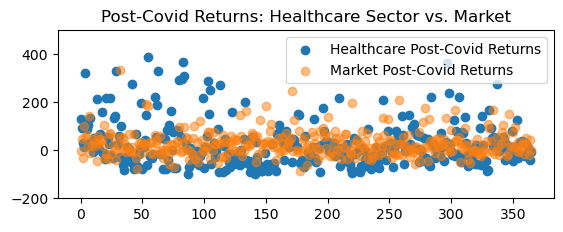

In [21]:
#plotting post-covid returns for market vs. healthcare
plt.subplot(2, 1, 1)
plt.scatter(range(len(healthcare_nomicro['Symbol'])), healthcare_nomicro['Return from 2020-2022 (Post-Covid)'], label="Healthcare Post-Covid Returns")
plt.scatter(range(len(market_sample_set['Symbol'])), market_sample_set['Return from 2020-2022 (Post-Covid)'], label="Market Post-Covid Returns", alpha = 0.5)
plt.legend()
plt.title('Post-Covid Returns: Healthcare Sector vs. Market')
plt.ylim(-200,500)
plt.savefig("Healthcare_Market_Scatter_Post_Covid_Returns.png")

plt.show()

###### It can be observed that there is more variation among healthcare returns

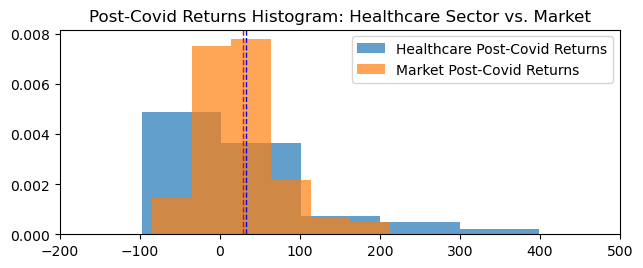

In [22]:
#plotting a histogram for post-covid returns for market vs. healthcare
plt.subplot(2, 1, 2)
plt.hist(healthcare_nomicro['Return from 2020-2022 (Post-Covid)'], 20, density=True, alpha=0.7, label="Healthcare Post-Covid Returns")
plt.hist(market_sample_set['Return from 2020-2022 (Post-Covid)'], 20, density=True, alpha=0.7, label="Market Post-Covid Returns")
plt.axvline(healthcare_nomicro['Return from 2020-2022 (Post-Covid)'].mean(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(market_sample_set['Return from 2020-2022 (Post-Covid)'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.legend()  
plt.tight_layout()
plt.xlim(-200,500)
plt.title('Post-Covid Returns Histogram: Healthcare Sector vs. Market')
plt.savefig("Healthcare_Market_Histogram_Post_Covid.png")

plt.show()

###### It can be observed that the mean return for healthcare is ever so slightly higher than the market returns. It can also be observed that there is much more variation in returns for healthcare than for the market as a whole.

###### Null Hypothesis: µ(returns of healthcare post covid)  =  µ(returns of market post covid) 


###### Alternative Hypothesis: µ(returns of healthcare post covid)  ≠  µ(returns of market post covid) 


In [23]:
#running a two-sample diff-in-diff t-test
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
st.ttest_ind(healthcare_nomicro['Return from 2020-2022 (Post-Covid)'], market_sample_set['Return from 2020-2022 (Post-Covid)'], equal_var=False)

Ttest_indResult(statistic=0.3436044031274581, pvalue=0.7312812319452231)

###### We fail to reject the null as the p value is ~0.73 which is not significant at any level. This means that there is no significant difference between market returns and healthcare returns.